# K-means++ clustering algorithm

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
import pandas as pd

# Load the dataset
data_path = 'cluster_data1.csv'
data = pd.read_csv(data_path)

data


,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6
...,...,...,...,...
145,5.4,3.9,1.3,0.4
146,5.3,3.7,1.5,0.2
147,6.1,2.6,5.6,1.4
148,5.7,3.8,1.7,0.3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


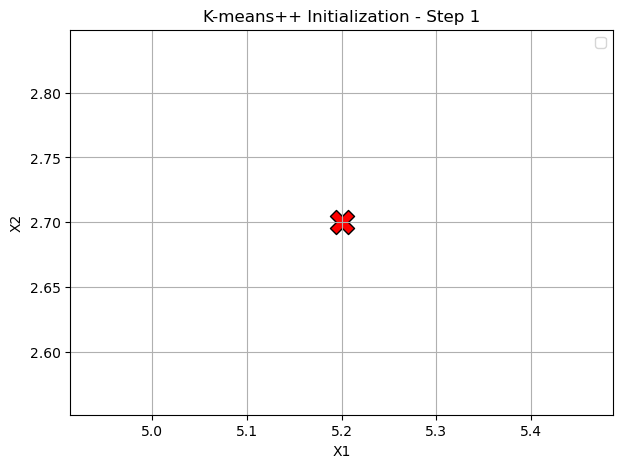

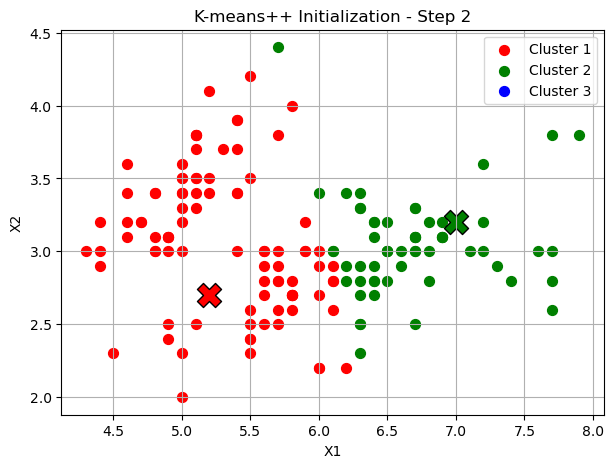

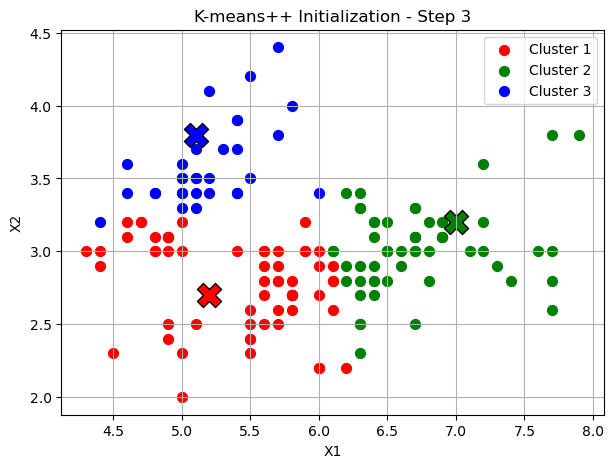

In [35]:
# Redefine the plotting function to use different colors for different centroids
def plot_individual_steps_with_cluster_colors(df, centroids_history_steps):
    # Colors for different clusters
    cluster_colors = ['red', 'green', 'blue']
    
    for i, centroids in enumerate(centroids_history_steps):
        # For each step, create a figure
        plt.figure(figsize=(7, 5))
        
        # Convert the current list of centroids to an array for distance computation
        centroids_arr = np.array(centroids)
        
        # If it's not the first step, assign points to the nearest centroid and plot them
        if i > 0:
            # Find the closest centroid for each data point
            closest, _ = pairwise_distances_argmin_min(df[['X1', 'X2']].values, centroids_arr)
            
            # Plot each point colored by the closest centroid
            for idx, color in enumerate(cluster_colors):
                plt.scatter(df['X1'][closest == idx], df['X2'][closest == idx], s=50, color=color, label=f'Cluster {idx+1}')
        
        # Plot the centroids, keep their color constant throughout
        for idx, centroid in enumerate(centroids_arr):
            plt.scatter(centroid[0], centroid[1], s=300, marker='X', color=cluster_colors[idx], edgecolor='black')
        
        plt.title(f'K-means++ Initialization - Step {i+1}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.grid(True)
        plt.show()

# Plot individual steps with different colors for different clusters
plot_individual_steps_with_cluster_colors(df[['X1', 'X2']], centroids_history_steps)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


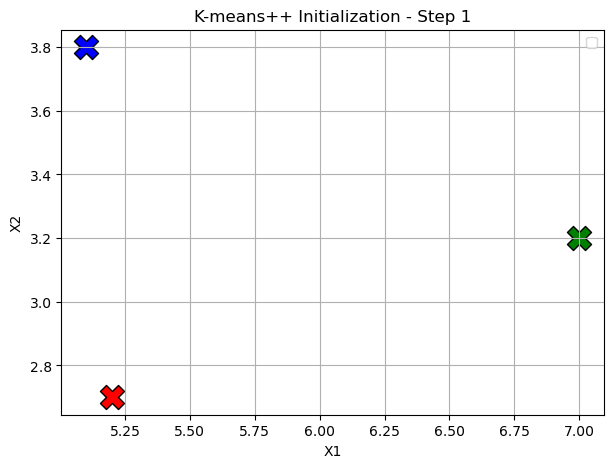

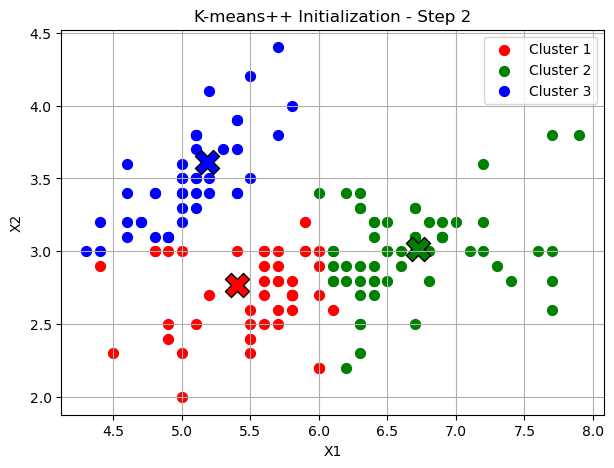

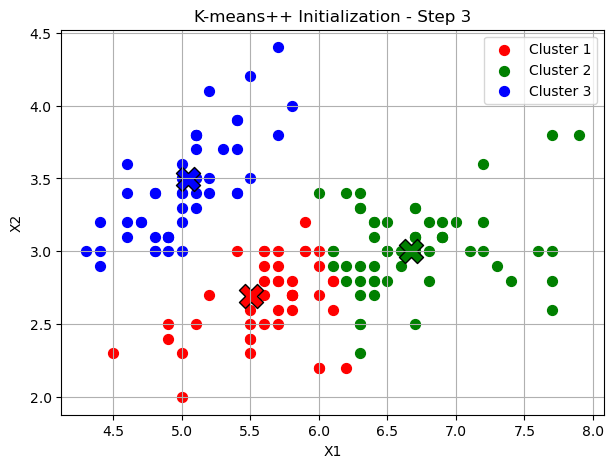

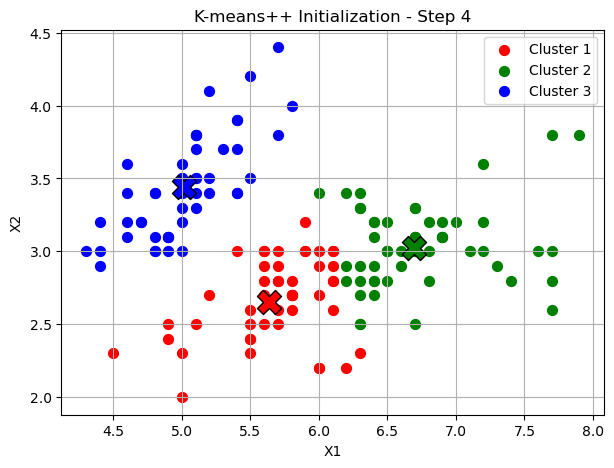

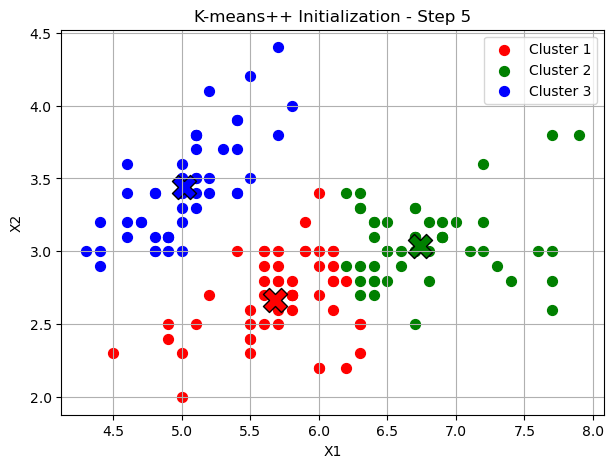

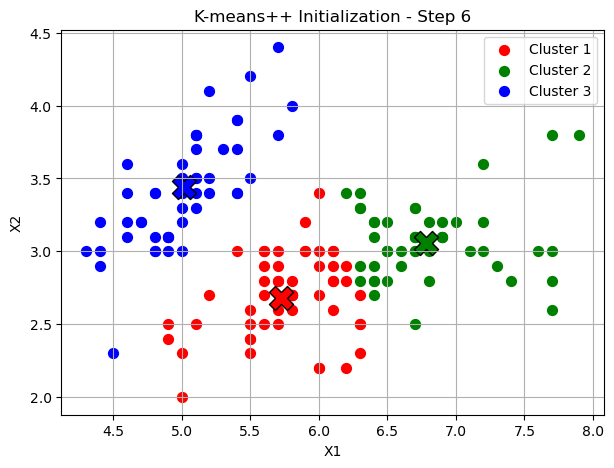

In [36]:
def kmeans(df, initial_centroids, max_iters):
    centroids = initial_centroids
    centroids_history = [centroids]
    for _ in range(max_iters):
        # Assign clusters
        closest, _ = pairwise_distances_argmin_min(df.values, centroids)
        
        # Recompute centroids
        new_centroids = np.array([df.values[closest == k].mean(axis=0) for k in range(len(centroids))])
        centroids = new_centroids
        centroids_history.append(centroids)
    return centroids_history

# We'll use the last centroids from K-means++ as the initial centroids for K-means
initial_centroids = centroids_history_steps[-1]

# Run K-means for 5 iterations
kmeans_centroids_history = kmeans(df[['X1', 'X2']], initial_centroids, 5)

# Plot individual steps with different colors for different clusters
plot_individual_steps_with_cluster_colors(df[['X1', 'X2']], kmeans_centroids_history)


# K-NN classification

In [22]:
df2 = pd.read_csv('cluster_data2.csv')
df2

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05
5,5.83,2.75,4.27,1.34
6,4.86,3.31,1.45,0.22
7,6.63,2.96,5.50,1.93
8,5.01,3.39,1.55,0.27
9,6.45,3.03,5.33,2.17


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Extract the final centroids after K-means
final_centroids = kmeans_centroids_history[-1]

# We'll assign labels to the centroids based on their order
# This is an arbitrary choice for labeling purposes
centroid_labels = np.arange(len(final_centroids))

# Train a K-NN classifier using the final centroids as the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(final_centroids, centroid_labels)

# Predict the class for each data point in the new dataset using only the first two features (X1 and X2)
df2_classified = df2[['X1', 'X2']].copy()
df2_classified['Class'] = knn.predict(df2[['X1', 'X2']].values)

# Show the first few rows of the dataframe with the assigned classes
df2_classified


,X1,X2,Class
0,5.21,3.65,0
1,5.07,3.41,0
2,5.85,2.65,0
3,5.64,2.73,0
4,6.55,2.90,0
5,5.83,2.75,0
6,4.86,3.31,0
7,6.63,2.96,0
8,5.01,3.39,0
9,6.45,3.03,0


In [45]:
def get_nearest_neighbor(point, new_data_with_clusters, k=3):

    # get the distance of the data point from the existsing data point
    distance = new_data_with_clusters.apply(lambda x: get_euclidean_distance(x[['X1', 'X2', 'X3', 'X4']].values, point[['X1', 'X2', 'X3', 'X4']].values), axis=1).to_list()
    
    # sort the distances and top k closest data points
    top_k_closest_neighbours = sorted(range(len(distance)), key=lambda i: -distance[i])[:k]

    # get the clusters which the top k data points are from 
    top_k_closest_neighbours_clusters = new_data_with_clusters.loc[top_k_closest_neighbours]['cluster'].to_list()

    # get the cluster which occurs the most in the clostest neighbours
    the_closest_cluster = max(top_k_closest_neighbours_clusters, key=top_k_closest_neighbours_clusters.count)

    # return the cluster
    return the_closest_cluster

In [46]:
# reading the dataset
data2 = pd.read_csv('cluster_data2.csv')

# lets assume k is 3
k = 3

In [47]:
data2

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05
5,5.83,2.75,4.27,1.34
6,4.86,3.31,1.45,0.22
7,6.63,2.96,5.50,1.93
8,5.01,3.39,1.55,0.27
9,6.45,3.03,5.33,2.17
